In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# グレースケール化
def rgb2gray(iamg):
    gray = 0.2126*img[...,2]+0.7152*img[...,1]+0.0722*img[...,0]
    return gray

# HOG特徴量の作成

In [13]:
def gen_hough(img):
    # グレースケール化
    gray_img = rgb2gray(img)
    H,W = gray_img.shape

    # 1要素分パディング
    gray = np.pad(gray_img, (1, 1), 'edge')
    # x方向の輝度勾配を計算
    gx = gray[1:H+1, 2:] - gray[1:H+1, :W]
    # y方向の輝度勾配を計算
    gy = gray[2:, 1:W+1] - gray[:H, 1:W+1]
    # arctanをとるためにx方向の0を補正
    gx[gx == 0] = 1e-6

    # 勾配強度, 勾配輝度を計算
    mag = np.sqrt(gx**2 + gy**2)
    ang = np.arctan(gy/gx)
    # 補正
    ang[ang<0] = np.pi/2 + ang[ang<0]+np.pi/2

    gradient_quantized = np.zeros_like(ang, dtype=np.uint8)
    d = np.pi / 9
    for i in range(9):
        gradient_quantized[np.where((ang >= d * i) & (ang <= d * (i + 1)))] = i
        
        
    _magnitude = ((mag / mag.max()) * 255).astype(np.uint8)

    out = np.zeros((H,W,3),dtype=np.uint8)
    C = [[255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 255, 0], [255, 0, 255], [0, 255, 255],
        [127, 127, 0], [127, 0, 127], [0, 127, 127]]
    for i in range(9):
        out[gradient_quantized==i] = C[i]
    
    # 勾配強度と勾配角度
    plt.figure(figsize=(10,4),facecolor="white")
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(_magnitude, cv2.COLOR_BGR2RGB))
    plt.title("gradient magnitude")
    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
    plt.title("gradient angle")
    plt.show()
    
    # 勾配ヒストグラムの作成
    N=8
    cell_N_H = H//N
    cell_N_W = W//N
    histogram = np.zeros((cell_N_H, cell_N_W, 9), dtype=np.float32)

    for y in range(cell_N_H):
        for x in range(cell_N_W):
            for j in range(N):
                for i in range(N):
                    histogram[y, x, gradient_quantized[y * 4 + j, x * 4 + i]] += mag[y * 4 + j, x * 4 + i]
                    
    # ヒストグラム正規化
    epsilon=1
    cell_N_H, cell_N_W, _ = histogram.shape
    #each histogram
    for y in range(cell_N_H):
        for x in range(cell_N_W):
            histogram[y, x] /= np.sqrt(np.sum(histogram[max(y - 1, 0) : min(y + 2, cell_N_H),
                                                                max(x - 1, 0) : min(x + 2, cell_N_W)] ** 2) + epsilon)
    plt.figure(facecolor="white",figsize=(8,8))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(histogram[..., i])
    plt.show()

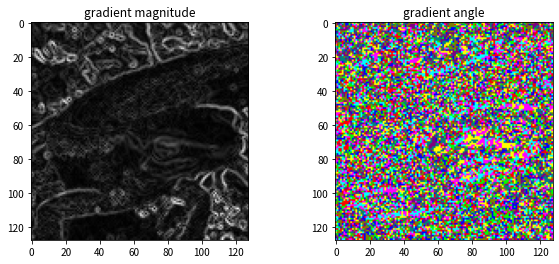

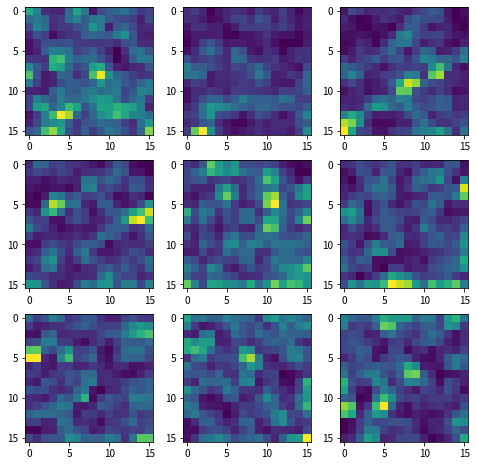

In [14]:
img = cv2.imread("./img/imori.jpg")

gen_hough(img)